In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn

In [ ]:
class CTDATASET(Dataset):
  def __init__(self,filepath):
    self.x , self.y = torch.load(filepath)
    self.x = self.x / 255
    self.y = F.one_hot(self.y).to(float)

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

In [ ]:
training_examples = CTDATASET('/content/training.pt')
print(len(training_examples))

60000


In [ ]:
training_dl = DataLoader(training_examples,batch_size = 10)
print(len(training_dl))
print(training_dl)
print(training_dl)

6000


In [ ]:
class NEURALNETWORK(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(28**2,100)
    self.layer2 = nn.Linear(100,50)
    self.layer3 = nn.Linear(50,10)
    self.activation = nn.ReLU()
  def forward(self,X):
    X = X.view(-1,28**2)
    X = self.activation(self.layer1(X))
    X = self.activation(self.layer2(X))
    X = self.layer3(X)
    return X.squeeze()

In [ ]:
func = NEURALNETWORK()
import torch.optim as optim
def training(t_dl,func,epochs):
  opt = optim.SGD(func.parameters(),lr=0.01)
  L = nn.CrossEntropyLoss()
  N = len(training_dl)
  noe=[];noe_Avg=[]
  lossvalue=[];lossvalue_Avg=[]
  for episodes in range(epochs):
    print('episode no:',episodes)
    for i,(x,y) in enumerate(t_dl):
      opt.zero_grad()
      loss = L(func(x),y)
      loss.backward()
      opt.step()
      noe.append(episodes+i/N)
      lossvalue.append(loss.item())

    noe_Avg.append(sum(noe)/N)
    lossvalue_Avg.append(sum(lossvalue)/N)
    noe=[];lossvalue=[]
  return np.array(noe_Avg),np.array(lossvalue_Avg)

episode no: 0
episode no: 1
episode no: 2
episode no: 3
episode no: 4
episode no: 5
episode no: 6
episode no: 7
episode no: 8
episode no: 9
episode no: 10
episode no: 11
episode no: 12
episode no: 13
episode no: 14
episode no: 15
episode no: 16
episode no: 17
episode no: 18
episode no: 19


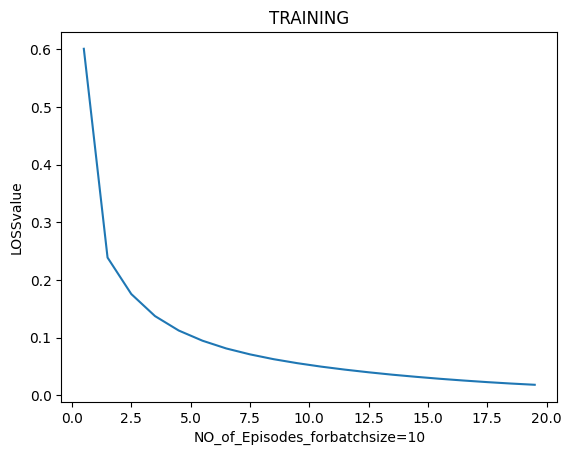

In [ ]:
noe,lv = training(training_dl,func,20)
plt.plot(noe,lv)
plt.title('TRAINING')
plt.ylabel('LOSSvalue')
plt.xlabel('NO_of_Episodes_forbatchsize=10')
plt.show()

In [ ]:
training_examples[0][1]
y=training_examples[0][1]
xsam=training_examples[0][0]
func(xsam)

tensor([ -3.4807,   2.6267,  -3.2679,  17.6859, -24.8675,  23.2578, -12.5252,
         -0.6207,  -3.6171,   3.3231], grad_fn=<SqueezeBackward0>)

ORIGINAL: tensor(7)
PREDICTED: tensor(7)


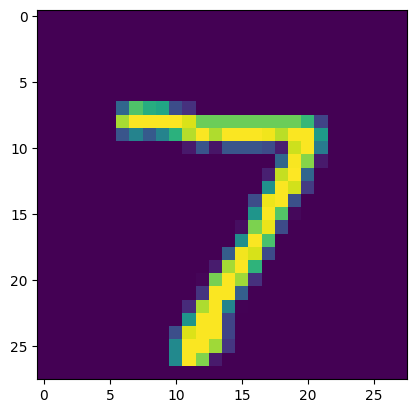

In [ ]:
test_exmpl = CTDATASET('/content/test.pt')
x,y=test_exmpl[0]
plt.imshow(x)
print('ORIGINAL:',torch.argmax(y))
print('PREDICTED:',torch.argmax(func(x)))

In [ ]:
xs,ys=test_exmpl[0:10]
print('ORIGINAL  :',torch.argmax(ys,axis=1))
print('PREDICTION:',torch.argmax(func(xs),axis=1))

ORIGINAL  : tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])
PREDICTION: tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])
